# Heart Disease Health Indicators



# Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


First we load the data.

In [ ]:
path = "/content/drive/MyDrive/Final_project_ML/heart_disease_health_indicators_BRFSS2015.csv"
df=pd.read_csv(path)


Exploring the dataset

In [ ]:
print("Data shape :", df.shape)
df.head()

Data shape : (253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


There are 253680 rows (examples) and 22 columns (21 feature + 1 target)
Also we remove the duplicate data.

In [ ]:
#Removing duplicate Values
df.drop_duplicates(inplace=True)

print("data shape :",df.shape)

data shape : (229781, 22)


# Check Balance of data
- We check if the data is balance or not, this information will helps us to analyze the data going forward

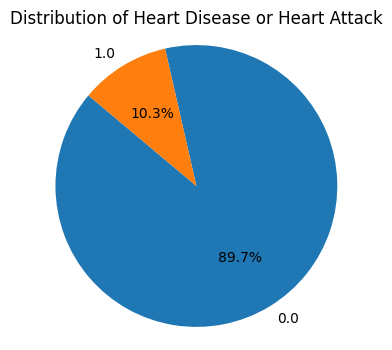

In [ ]:
# Calculate the distribution of the 'HeartDiseaseorAttack' variable
heart_disease_counts = df['HeartDiseaseorAttack'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))  # You can adjust the figure size as needed
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease or Heart Attack')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

- As we can see, the data is highly imbalanced, with a significantly larger number of instances in class 0 compared to class 1
  that will affect on the result of models.

# Normalized The Data
- We shuffle the data
- normalize the data and split the data to train and test
- We shown the means and the standard of normalized.

In [ ]:
#shuffled the data so that there is no situation where they came in a ready-made format and this will affect the continuation
shuffled = df.sample(frac=1)

#split the data to X and Y
y = shuffled.iloc[:, 0] #HeartDiseaseorAttack
x = shuffled.iloc[:, 1:] #All Feature
scaler = preprocessing.StandardScaler()
d = scaler.fit_transform(x)
xNormalized = pd.DataFrame(d, columns=x.columns)
mean = xNormalized.mean()
std_dev = xNormalized.std()
print ("The means is : ", mean)
print ("The std is : ", std_dev)

# split the data to 67% train and 33% test
X_train, X_test, y_train, y_test = train_test_split(xNormalized, y, test_size=0.33, random_state=42)

The means is :  HighBP               8.564016e-17
HighChol            -1.479337e-16
CholCheck            1.601791e-16
BMI                 -1.992034e-16
Smoker              -4.168754e-17
Stroke               1.011169e-17
Diabetes             1.216031e-16
PhysActivity         4.222482e-17
Fruits              -8.795935e-17
Veggies             -1.398166e-16
HvyAlcoholConsump    6.329857e-17
AnyHealthcare       -9.245859e-17
NoDocbcCost          4.981632e-17
GenHlth              1.338176e-16
MentHlth             3.607122e-17
PhysHlth            -3.151787e-17
DiffWalk            -9.616931e-18
Sex                  4.086422e-17
Age                 -1.573188e-16
Education           -1.447487e-16
Income              -1.782688e-17
dtype: float64
The std is :  HighBP               1.000002
HighChol             1.000002
CholCheck            1.000002
BMI                  1.000002
Smoker               1.000002
Stroke               1.000002
Diabetes             1.000002
PhysActivity         1.000002
F

In [ ]:
#see normlize data
print(X_train.head())


          HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  Diabetes  \
142299 -0.912679  1.124132   0.205356 -0.395746 -0.933526 -0.216455 -0.449376   
112154  1.095675 -0.889575  -4.869594  0.193673 -0.933526 -0.216455 -0.449376   
77653  -0.912679  1.124132   0.205356 -1.279874 -0.933526 -0.216455 -0.449376   
98419  -0.912679  1.124132   0.205356 -0.248391  1.071208 -0.216455 -0.449376   
84307   1.095675  1.124132   0.205356 -0.690456 -0.933526 -0.216455 -0.449376   

        PhysActivity    Fruits   Veggies  ...  AnyHealthcare  NoDocbcCost  \
142299       0.60299 -1.258473 -1.968149  ...       0.238745    -0.319852   
112154       0.60299 -1.258473  0.508092  ...       0.238745     3.126450   
77653        0.60299  0.794614  0.508092  ...       0.238745    -0.319852   
98419        0.60299 -1.258473  0.508092  ...       0.238745    -0.319852   
84307        0.60299  0.794614  0.508092  ...       0.238745    -0.319852   

         GenHlth  MentHlth  PhysHlth  DiffWalk    

# Plot the result of models

In [ ]:
def plot_result (y_test, y_pred):
    # Create a confusion matrix
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True, fmt='d')

    # Print evaluation metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)  # Calculate Precision
    f1 = f1_score(y_test, y_pred)  # Calculate F1-score

    print('Accuracy:', accuracy)      #need to add precision   כמה חולים תפסת מתוך כל החולים באמת
    print('Recall:', recall)
    print('Precision:', precision)  # Precision measures the model's ability to correctly identify true positives
    print('F1-Score:', f1)  # Print F1-score

    plt.show()

# logistic_regression
- The first algorithm that we want to implement is logistic_regression.
- We will want to classifier the data

In [ ]:
def logistic_reg (X_train, y_train,X_test):
    # Initialize and train the logistic regression model
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    # Predictions
    y_pred = logistic_regression.predict(X_test)
    y_prob = logistic_regression.predict_proba(X_test)
    return y_pred, y_prob

Accuracy: 0.8991533470485836
Recall: 0.11968016507608976
Precision: 0.5305889079473985
F1-Score: 0.19530674523834576


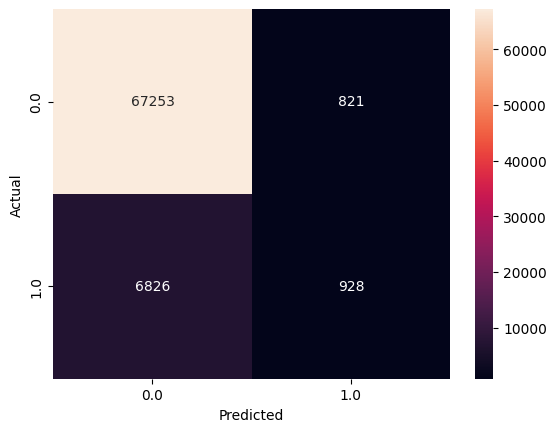

In [ ]:
y_pred_LR, y_prob_LR= logistic_reg (X_train, y_train,X_test)
plot_result (y_test, y_pred_LR)


You can clearly see that the Accuracy is indeed good, on the other hand, the Recall is not good, and therefore the confusion matrix looks like this.
Another thing that can be learned from the matrix is ​​that there are too many times in which the model predicted that the person is healthy, when in fact the person can indeed suffer from heart disease, in this case of heart attacks, this is an undesirable thing

# KNN ALGORITHM

- We will try to use an algorithm that does not build a model, for example the KNN algorithm.
- We will use the same X and Y data.

In [ ]:
# Display the two DataFrames
print("x:")
print(x.head())

print("y:")
print(y.head())

x:
        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  \
18286      0.0       1.0        1.0  21.0     1.0     0.0       0.0   
59305      1.0       1.0        1.0  26.0     0.0     0.0       0.0   
57246      0.0       1.0        1.0  28.0     0.0     0.0       0.0   
175525     0.0       1.0        1.0  30.0     0.0     0.0       0.0   
156139     0.0       0.0        1.0  28.0     0.0     0.0       0.0   

        PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
18286            1.0     1.0      1.0  ...            1.0          1.0   
59305            1.0     1.0      1.0  ...            1.0          0.0   
57246            1.0     0.0      1.0  ...            1.0          0.0   
175525           1.0     1.0      1.0  ...            1.0          0.0   
156139           1.0     1.0      1.0  ...            1.0          0.0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
18286       1.0      30.0       0.0       0.0  

In [ ]:
def knn (X_train, y_train, X_test):

    # Create the KNN classifier with the best k
    knn = KNeighborsClassifier(n_neighbors=5)

    # Train the model on the training data
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    return y_pred

Accuracy: 0.8856886638181147
Recall: 0.153974358974359
Precision: 0.3672782874617737
F1-Score: 0.21698283649503164


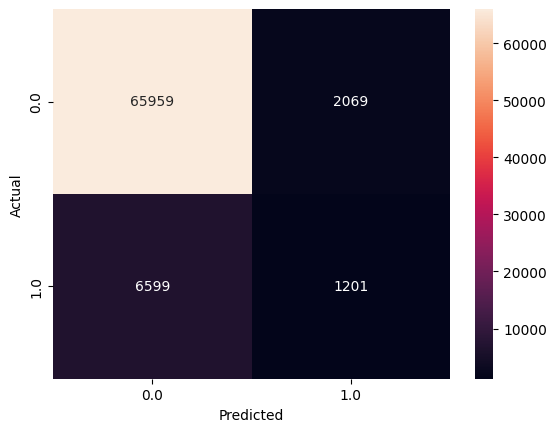

In [ ]:
y_pred_knn= knn (X_train, y_train, X_test)
plot_result (y_test, y_pred_knn)

# adaboost with LR
- We running adaboost by the base classifier logistic regression

In [ ]:
def adaboost_LogisticRegression (X_train, y_train,X_test):
    base_classifier = LogisticRegression(random_state=42)
    # Create an AdaBoost classifier using the Logistic Regression as the base estimator (this is the "weak learner"- 50%+ epsilon%)

    model_AdaBoost = AdaBoostClassifier(estimator=base_classifier, n_estimators=50) #We build the model that will fit, the model vase on LR and n_estimators- We used in 50 models of LR that will build a "strong model" (all h)

    model_AdaBoost.fit(X_train, y_train) #update wheight # fit model
    y_pred_adaboost = model_AdaBoost.predict(X_test)
    return y_pred_adaboost


Accuracy: 0.8988500290130295
Recall: 0.13231880319834924
Precision: 0.5213414634146342
F1-Score: 0.2110676815470068


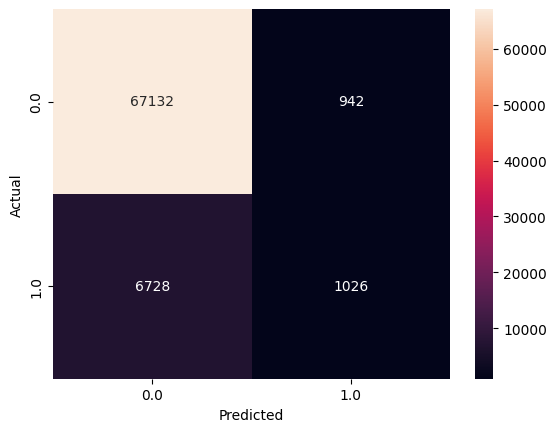

In [ ]:
y_pred_adaboost= adaboost_LogisticRegression (X_train, y_train,X_test)
plot_result (y_test, y_pred_adaboost)

# Explain for the data
The data is not balance, as a result we can see the the algorithms not give a 50+ epsilone succes therefore the Adaboost not working well.
Also the KNN algorithm has a bad errpr metric, beacuse the data is not balance.

#Method to fix balance data

> Indented block


- we used in RandomUnderSampler to fix the data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.7)
X_under, y_under = undersample.fit_resample(x, y)

X_under.shape , y_under.shape

((57598, 21), (57598,))

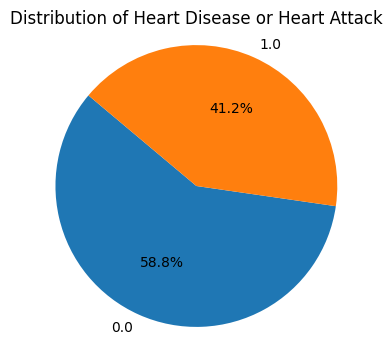

In [ ]:
# Calculate the distribution of the 'HeartDiseaseorAttack' variable
heart_disease_counts = y_under.value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))  # You can adjust the figure size as needed
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heart Disease or Heart Attack')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [ ]:
scaler = preprocessing.StandardScaler()
d = scaler.fit_transform(X_under)
xNormalized_us = pd.DataFrame(d, columns=X_under.columns)

# split the data to 67% train and 33% test
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(xNormalized_us, y_under, test_size=0.33, random_state=42)

# New Result for balance data
- Now when the data is balance we can excpeting to good error metric

- Run again Logistic regression with balance data

Accuracy: 0.7596801346801347
Recall: 0.693791517629024
Precision: 0.7144172586161537
F1-Score: 0.703953337653921


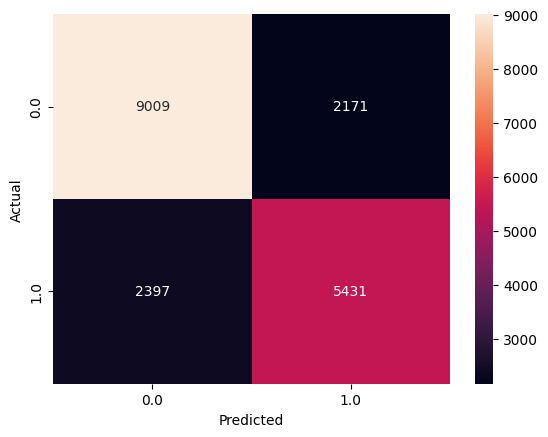

In [ ]:
y_pred_LR_us, y_prob_LR= logistic_reg (X_train_us, y_train_us,X_test_us)
plot_result (y_test_us, y_pred_LR_us)

- Run again Knn with balance data

Accuracy: 0.71875
Recall: 0.6637710781808891
Precision: 0.656890012642225
F1-Score: 0.6603126191383911


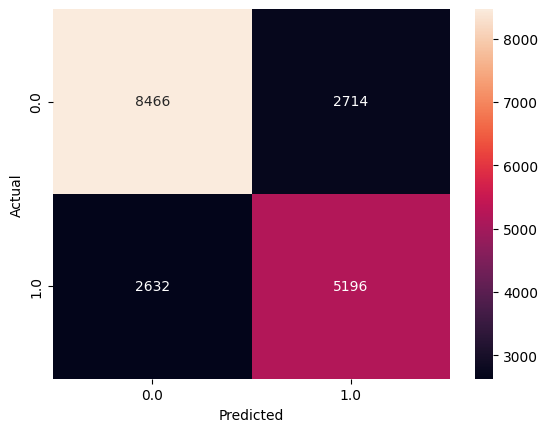

In [ ]:
y_pred_knn_us= knn (X_train_us, y_train_us,X_test_us)
plot_result (y_test_us, y_pred_knn_us)

Accuracy: 0.7085904942765205
Recall: 0.8230590662883673
Precision: 0.23543734090825247
F1-Score: 0.3661398123978084


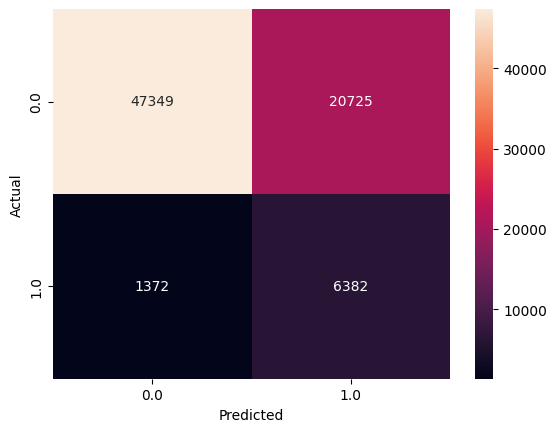

In [ ]:
y_pred_adaboost_us= adaboost_LogisticRegression (X_train_us, y_train_us,X_test)
plot_result (y_test, y_pred_adaboost_us)

# **Explain**
The fix of data improve the error metric but adaboost doesn't improve more, becuase:
1. there is overfitting. The LR model made a good metric of error that Adaboost can not improve it.
2. The data is more balance but is not totaly balanced (50% to class zero and 50% to class 1) and maybe it's the causes that Adaboost not improve.

